In [2]:
print("hello World")


hello World


In [10]:
import numpy as np 
import pandas as pd 


In [1]:
# this is way to write a name.
first_name= "Vikram"

# this is another way 
Last_name= "Chavare"


In [2]:
print(first_name + " " + Last_name)


Vikram Chavare


In [15]:
data= [ "a", "b", "d", "b", "c", "a", "b"]
data.count()



TypeError: 'list' object is not callable

In [14]:
print(data.count("a"))

2


In [8]:
class Polynomial(object):
    def __init__(self, coef, name="P(x)"):
        self.coef =coef
        self.name=name
    def degree(self):
        return len(self.coef) - 1
    def __call__(self,x):
        degree = self.degree()
        value=0.0
        for i in range(degree+1):
            value += self.coef[i]*(x**(degree-i))
        return value





In [9]:
p= Polynomial([1,0,-2,1])
print(p(2))

5.0


In [25]:
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing

In [28]:
california = fetch_california_housing()

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [30]:
data = pd.DataFrame(california.data , columns=california.feature_names)

In [34]:
data['target'] = california.target


In [47]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

# Use one or more features for your regression model
# For example, let's use 'MedInc' (median income) and 'HouseAge' (median house age)
X = data[['MedInc']].values
y = data['target'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now, you can proceed with building your regression model using the chosen features.
# You can use the steps mentioned in the previous examples with the new dataset.

# Example:
# Add a column of ones to X for the bias term
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Perform linear regression (you can use the normal equation or gradient descent)
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)

# Make predictions on the test set
y_pred = X_test_b.dot(theta_best)

# Evaluate the model, e.g., calculate mean squared error
mse = np.mean((y_pred - y_test)**2)
print(f'Mean Squared Error: {mse}')
print(X_test)

# Continue with any additional analysis or adjustments as needed.


Mean Squared Error: 0.7091157771765548
[[1.6812]
 [2.5313]
 [3.4801]
 ...
 [9.2298]
 [2.785 ]
 [3.5521]]


In [36]:
import matplotlib.pyplot as plt



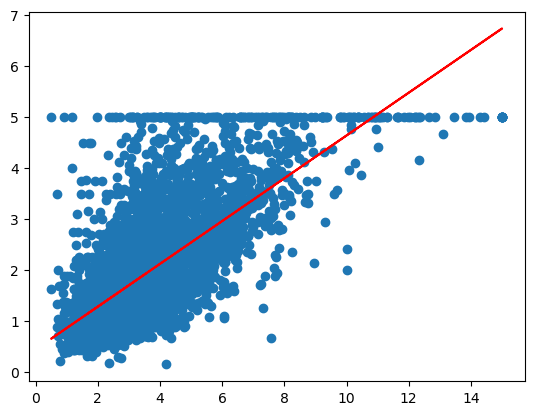

In [49]:
plt.scatter(X_test, y_test, label='Actual Data Points')
plt.plot(X_test, y_pred, color='red')

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load the Titanic dataset
titanic_data = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

# Select features and target variable
features = ['Pclass', 'Sex']  # Change 'Embarked' to 'Sex'
target = 'Survived'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(titanic_data[features], titanic_data[target], test_size=0.2, random_state=42)

# Define preprocessing steps
numeric_features = []  # No numeric features in this case
categorical_features = ['Pclass', 'Sex']  # Change 'Embarked' to 'Sex'

# Create transformers for numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Create a pipeline that includes preprocessing and the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', rf_model)])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')



Accuracy: 0.7247191011235955


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()



In [17]:
X, y = cancer.data, cancer.target

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
# Features (X) and target (y)
X, y_categorical = cancer.data, cancer.target

# Select 'mean area' as the numerical target variable
numerical_target_variable = 'mean area'
numerical_target_index = list(cancer.feature_names).index(numerical_target_variable)

# Use 'mean area' as the numerical target variable
y_numerical = X[:, numerical_target_index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numerical, test_size=0.2, random_state=42)

# Train a Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 158.60599038596513


In [25]:
print(y_pred)

[ 480.202 1122.25   742.123  466.718  404.39  1277.44  1522.67   955.709
  523.896  598.696  538.635  886.411  686.808  816.132  468.096 1133.86
  681.938  315.001  200.416 1307.77   585.3    445.201 1445.93   310.851
  416.674  558.341  543.206  321.545  495.213  926.973  380.624  448.836
  292.419  574.372  314.773  408.531  798.182  426.632 1042.046  664.238
  336.813  712.542  408.91   428.041  433.05   395.453  261.747  270.517
  415.883  515.75   925.019 1087.02   530.724  597.623  432.556  537.914
  324.728 1848.74   558.961  387.231  507.699 1208.21  1485.43   642.276
  464.38   493.386  782.541 1258.39   428.14   514.263  587.86   777.165
  609.169  837.138  192.554  547.967  604.254  602.294  355.733  385.896
  807.503  390.81   645.474 1362.81   991.696  714.204  477.308  980.419
  449.252  504.757  442.358  555.484  690.388  384.372  386.527  293.082
 1259.88   596.305  382.205  932.863  762.935  289.082 1002.697  992.925
  359.907  422.503  464.791 1777.07   641.857  664.8